****
## Data Wrangling - JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## imports for Python, Pandas

In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
from pandas.io.json import json_normalize

In [2]:
# load data
df = pd.read_json('data/world_bank_projects.json')

In [3]:
df.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [4]:
# show column names
df.columns

Index(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline',
       'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode',
       'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty',
       'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt',
       'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4',
       'prodlinetext', 'productlinetype', 'regionname', 'status',
       'country_namecode', 'envassesmentcategorycode', 'project_abstract',
       'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype',
       'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3',
       'majorsector_percent', 'board_approval_month', 'theme_namecode',
       'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt',
       'sector_namecode', '_id'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
sector                      500 non-null object
supplementprojectflg        498 non-null object
projectfinancialtype        500 non-null object
prodline                    500 non-null object
mjtheme                     491 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
project_name                500 non-null object
mjthemecode                 500 non-null object
closingdate                 370 non-null object
totalcommamt                500 non-null int64
id                          500 non-null object
mjsector_namecode           500 non-null object
docty                       446 non-null object
sector1                     500 non-null object
lendinginstr                495 non-null object
countrycode                 500 non-null object
sector2                     380 non-null object
totalamt                    500 n

In [10]:
# show missing values for each column
df.isnull().sum().sort_values(ascending=False).head(18)

sector4                     326
sector3                     235
project_abstract            138
closingdate                 130
sector2                     120
envassesmentcategorycode     70
docty                        54
projectdocs                  54
impagency                    28
borrower                     15
theme_namecode                9
themecode                     9
mjtheme                       9
lendinginstrtype              5
lendinginstr                  5
supplementprojectflg          2
mjsector_namecode             0
sector1                       0
dtype: int64

### 1. Find the 10 countries with most projects

In [11]:
# find the top-10 countries with the most projects
df['countryname'].value_counts().head(11)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Federative Republic of Brazil       9
Name: countryname, dtype: int64

Remove Africa, because it is not a country

In [12]:
df_most_project_country = df[df['countryname']!='Africa']['countryname'].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 countries with most projects')

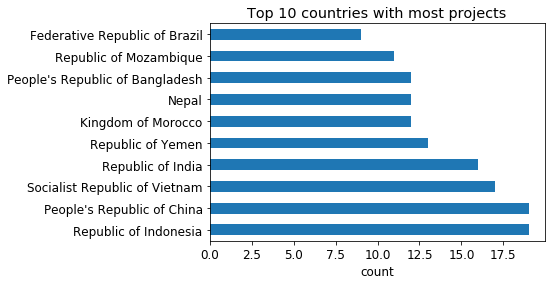

In [15]:
df_most_project_country.plot(kind='barh')
plt.xlabel('count')
plt.title('Top 10 countries with most projects')

### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [16]:
# load data
with open('data/world_bank_projects.json') as json_file:
    json_data = json.load(json_file)
    
theme = json_normalize(json_data, 'mjtheme_namecode')
theme.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [17]:
theme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
code    1499 non-null object
name    1499 non-null object
dtypes: object(2)
memory usage: 23.5+ KB


In [23]:
# find empty entries in name and code column
print('name column has ' +str(theme[theme['name']=='']['name'].count())+' empty entries') 
print('code column has '+str(theme[theme['code']=='']['code'].count())+' empty entries')

name column has 122 empty entries
code column has 0 empty entries


In [24]:
# remove empty entreis in name column
theme_copy = theme[theme['name']!='']
theme_copy.head()

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance


In [25]:
theme_copy.shape

(1377, 2)

In [26]:
# drop duplicate
theme_unique = theme_copy.drop_duplicates()

In [27]:
theme_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 252
Data columns (total 2 columns):
code    11 non-null object
name    11 non-null object
dtypes: object(2)
memory usage: 264.0+ bytes


In [28]:
theme_unique

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
8,7,Social dev/gender/inclusion
11,4,Financial and private sector development
18,10,Rural development
53,9,Urban development


In [29]:
# dataframe for top 10 theme
df_top10_theme = theme_copy['name'].value_counts()

Text(0.5, 1.0, 'Top 10 project theme')

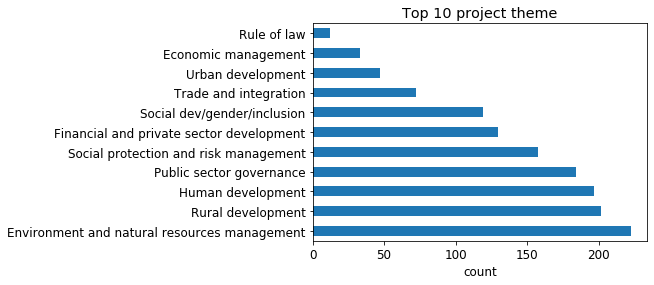

In [30]:
df_top10_theme.plot(kind='barh')
plt.xlabel('count')
plt.title('Top 10 project theme')

### 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [31]:
# merge theme and them_unique dataframe
pd_fill_missing_theme = pd.merge(theme, theme_unique, on = 'code')

In [32]:
pd_fill_missing_theme.head()

,code,name_x,name_y
0,8,Human development,Human development
1,8,,Human development
2,8,Human development,Human development
3,8,Human development,Human development
4,8,Human development,Human development


In [33]:
pd_fill_missing_theme_1 = pd_fill_missing_theme[['code','name_y']]
pd_fill_missing_theme_1.columns = ['code', 'name']

In [34]:
pd_fill_missing_theme_1.sample(10)

,code,name
895,2,Public sector governance
1085,4,Financial and private sector development
1157,4,Financial and private sector development
1090,4,Financial and private sector development
565,6,Social protection and risk management
1143,4,Financial and private sector development
744,2,Public sector governance
987,7,Social dev/gender/inclusion
947,7,Social dev/gender/inclusion
509,6,Social protection and risk management
